## Importing Packages

In [1]:
# storing and anaysis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Reading Data

In [2]:
# Importing data into date format not
covid_df = pd.read_csv("covid_19_india.csv", parse_dates=['Date'], dayfirst=True)

# first few rows
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


## Cleaning the data for analysis

In [3]:
# Checking each column for null values
covid_df.isnull().sum(axis = 0)

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [4]:
# this is also a good way to learn if columns contain null values
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [5]:
# checking the size of the dataframe before removing some data
covid_df.shape

(18110, 9)

In [6]:
# Keeping only required columns
covid_df=covid_df[['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed']]

# renaming Columns name
covid_df.columns=['date', 'state', 'cured', 'deaths', 'confirmed']

# Add active_cases column
covid_df['active'] = covid_df['confirmed']-(covid_df['cured']+covid_df['deaths'])

In [7]:
# first few rows of modified Data Set: earlier dates
covid_df.head()

,date,state,cured,deaths,confirmed,active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [8]:
# first few rows of modified Data Set: latest dates
covid_df.tail()

,date,state,cured,deaths,confirmed,active
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [9]:
#Keeping it simple, we will drop the rows with state name ending with "***" 
# as it is seems to be rows with incomplete values.
def drop_star(covid_df):
    for i in covid_df['state'].iteritems():
        if i[1][-3:] == "***":
            covid_df.drop(i[0],inplace=True)
        
drop_star(covid_df)
covid_df['state'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli',
       'Himanchal Pradesh', 'Karanataka'], dtype=object)

## Descriptive Analysis
As you can see below, the last data recorded in this dataset was on 11th August, 2021. So, the following analysis is valid till the mentioned date.

In [10]:
# find the total confirmed cases in each state
total_confirmed = covid_df.groupby("state")["confirmed"].aggregate(max)
total_confirmed

state
Andaman and Nicobar Islands                    7548
Andhra Pradesh                              1985182
Arunachal Pradesh                             50605
Assam                                        576149
Bihar                                        725279
Cases being reassigned to states               9265
Chandigarh                                    61992
Chhattisgarh                                1003356
Dadra and Nagar Haveli                        10377
Dadra and Nagar Haveli and Daman and Diu      10654
Daman & Diu                                       2
Delhi                                       1436852
Goa                                          172085
Gujarat                                      825085
Haryana                                      770114
Himachal Pradesh                             208616
Himanchal Pradesh                            204516
Jammu and Kashmir                            322771
Jharkhand                                    347440
Karana

In [11]:
# find the total death cases in each state
total_deaths = covid_df.groupby("state")["deaths"].max()
total_deaths

state
Andaman and Nicobar Islands                    129
Andhra Pradesh                               13564
Arunachal Pradesh                              248
Assam                                         5420
Bihar                                         9646
Cases being reassigned to states                 0
Chandigarh                                     811
Chhattisgarh                                 13544
Dadra and Nagar Haveli                           4
Dadra and Nagar Haveli and Daman and Diu         4
Daman & Diu                                      0
Delhi                                        25068
Goa                                           3164
Gujarat                                      10077
Haryana                                       9652
Himachal Pradesh                              3537
Himanchal Pradesh                             3507
Jammu and Kashmir                             4392
Jharkhand                                     5130
Karanataka               

In [12]:
# find the total cured cases in each state
total_cured = covid_df.groupby("state")["cured"].max()
total_cured

state
Andaman and Nicobar Islands                    7412
Andhra Pradesh                              1952736
Arunachal Pradesh                             47821
Assam                                        559684
Bihar                                        715352
Cases being reassigned to states                  0
Chandigarh                                    61150
Chhattisgarh                                 988189
Dadra and Nagar Haveli                        10261
Dadra and Nagar Haveli and Daman and Diu      10646
Daman & Diu                                       0
Delhi                                       1411280
Goa                                          167978
Gujarat                                      814802
Haryana                                      759790
Himachal Pradesh                             202761
Himanchal Pradesh                            200040
Jammu and Kashmir                            317081
Jharkhand                                    342102
Karana

Text(0, 0.5, 'Number of cases in millions')

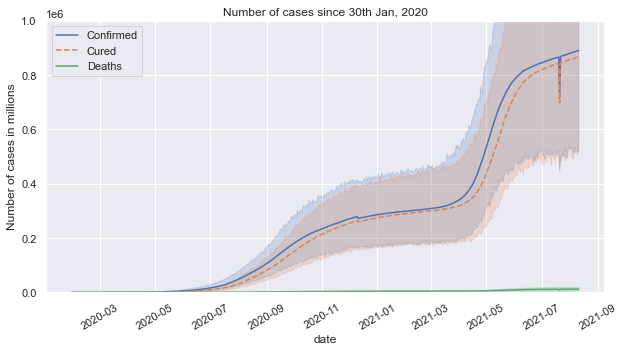

In [13]:
# plotting a time series graph of the number of cases
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data=covid_df, x="date", y="confirmed", label="Confirmed")
sns.lineplot(data=covid_df, x="date", y="cured", label="Cured", linestyle="dashed")
sns.lineplot(data=covid_df, x="date", y="deaths", label="Deaths")
plt.xticks(rotation=30)
plt.ylim((0, 1000000))
plt.title("Number of cases since 30th Jan, 2020")
plt.ylabel("Number of cases in millions")

In [14]:
# Last date of covid data set
covid_df["date"].max()

Timestamp('2021-08-11 00:00:00')

In [15]:
# current day
today = covid_df[covid_df.date=='2021-08-11']
today.head()

,date,state,cured,deaths,confirmed,active
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548,7
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,18882
18076,2021-08-11,Arunachal Pradesh,47821,248,50605,2536
18077,2021-08-11,Assam,559684,5420,576149,11045
18078,2021-08-11,Bihar,715352,9646,725279,281


#### Having a look at the top 5 states in each category:

In [16]:
# sorting data w.r.t number of confirmed cases
max_confirmed_cases=today.sort_values(by='confirmed',ascending=False)
max_confirmed_cases.head()

,date,state,cured,deaths,confirmed,active
18094,2021-08-11,Maharashtra,6159676,134201,6363442,69565
18090,2021-08-11,Kerala,3396184,18004,3586693,172505
18089,2021-08-11,Karnataka,2861499,36848,2921049,22702
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,20363
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,18882


Having a look at the top 5 states in each category:

In [17]:
# Getting the Top 5 states with maximum number of confirmed cases
top_confirmed_states=max_confirmed_cases[0:5]
top_confirmed_states.head()

,date,state,cured,deaths,confirmed,active
18094,2021-08-11,Maharashtra,6159676,134201,6363442,69565
18090,2021-08-11,Kerala,3396184,18004,3586693,172505
18089,2021-08-11,Karnataka,2861499,36848,2921049,22702
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,20363
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,18882


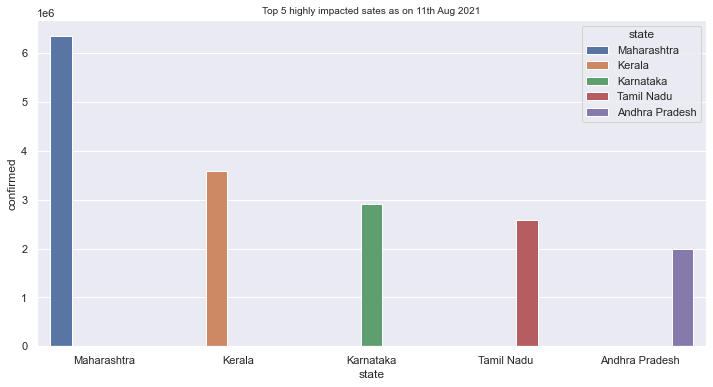

In [18]:
# Making bar plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(12,6)})
plt.title("Top 5 highly impacted sates as on 11th Aug 2021", size=10)
sns.barplot(x='state', y='confirmed', data=top_confirmed_states,hue='state')
plt.show()

In [19]:
# Getting the Top 5 states with maximum number of Death cases
top_death_states=today.sort_values(by='deaths',ascending=False)[0:5]
top_death_states.head()

,date,state,cured,deaths,confirmed,active
18094,2021-08-11,Maharashtra,6159676,134201,6363442,69565
18089,2021-08-11,Karnataka,2861499,36848,2921049,22702
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,20363
18082,2021-08-11,Delhi,1411280,25068,1436852,504
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545


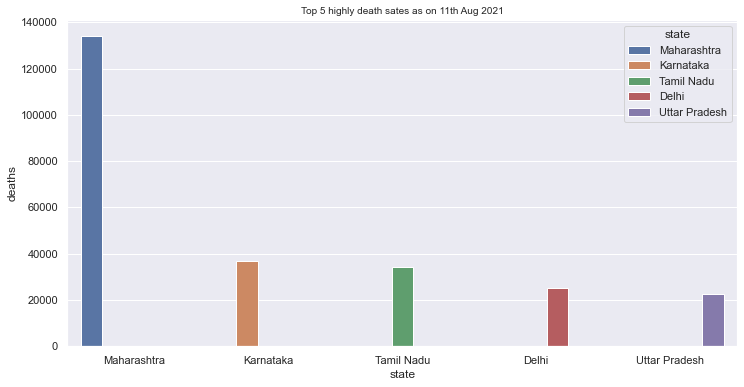

In [20]:
# Making bar plot for states with top death cases
sns.set(rc={'figure.figsize':(12,6)})
plt.title("Top 5 highly death sates as on 11th Aug 2021", size=10)
sns.barplot(x='state', y='deaths', data=top_death_states,hue='state')
plt.show()

In [21]:
# Getting the Top 5 states with maximum number of Cured cases
top_cured_states=today.sort_values(by='cured',ascending=False)[0:5]
top_cured_states.head()

,date,state,cured,deaths,confirmed,active
18094,2021-08-11,Maharashtra,6159676,134201,6363442,69565
18090,2021-08-11,Kerala,3396184,18004,3586693,172505
18089,2021-08-11,Karnataka,2861499,36848,2921049,22702
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,20363
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,18882


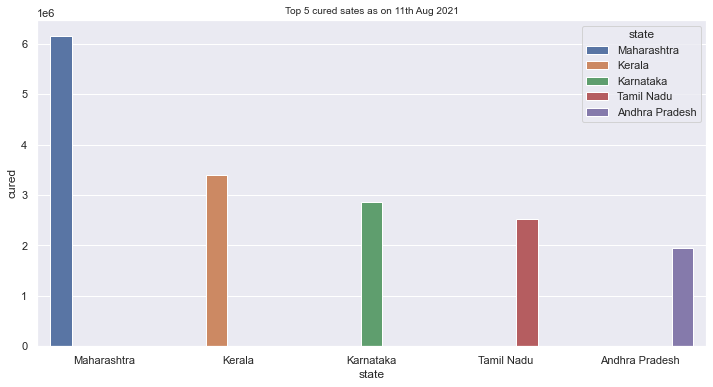

In [22]:
# Making bar plot for states with top Cured cases
sns.set(rc={'figure.figsize':(12,6)})
plt.title("Top 5 cured sates as on 11th Aug 2021", size=10)
sns.barplot(x='state', y='cured', data=top_cured_states,hue='state')
plt.show()

#### Comparision of Active, Cured and Death of Top States

In [23]:
# Extract Top 6 states
states=['Kerala', 'Tamil Nadu', 'Maharashtra', 'Tamil Nadu', 'Andhra Pradesh', 'Uttar Pradesh']
mh=covid_df[covid_df['state']=='Maharashtra']
kl=covid_df[covid_df['state']=='Kerala']
ka=covid_df[covid_df['state']=='Karnataka']
tn=covid_df[covid_df['state']=='Tamil Nadu']
ap=covid_df[covid_df['state']=='Andhra Pradesh']
up=covid_df[covid_df['state']=='Uttar Pradesh']

colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']

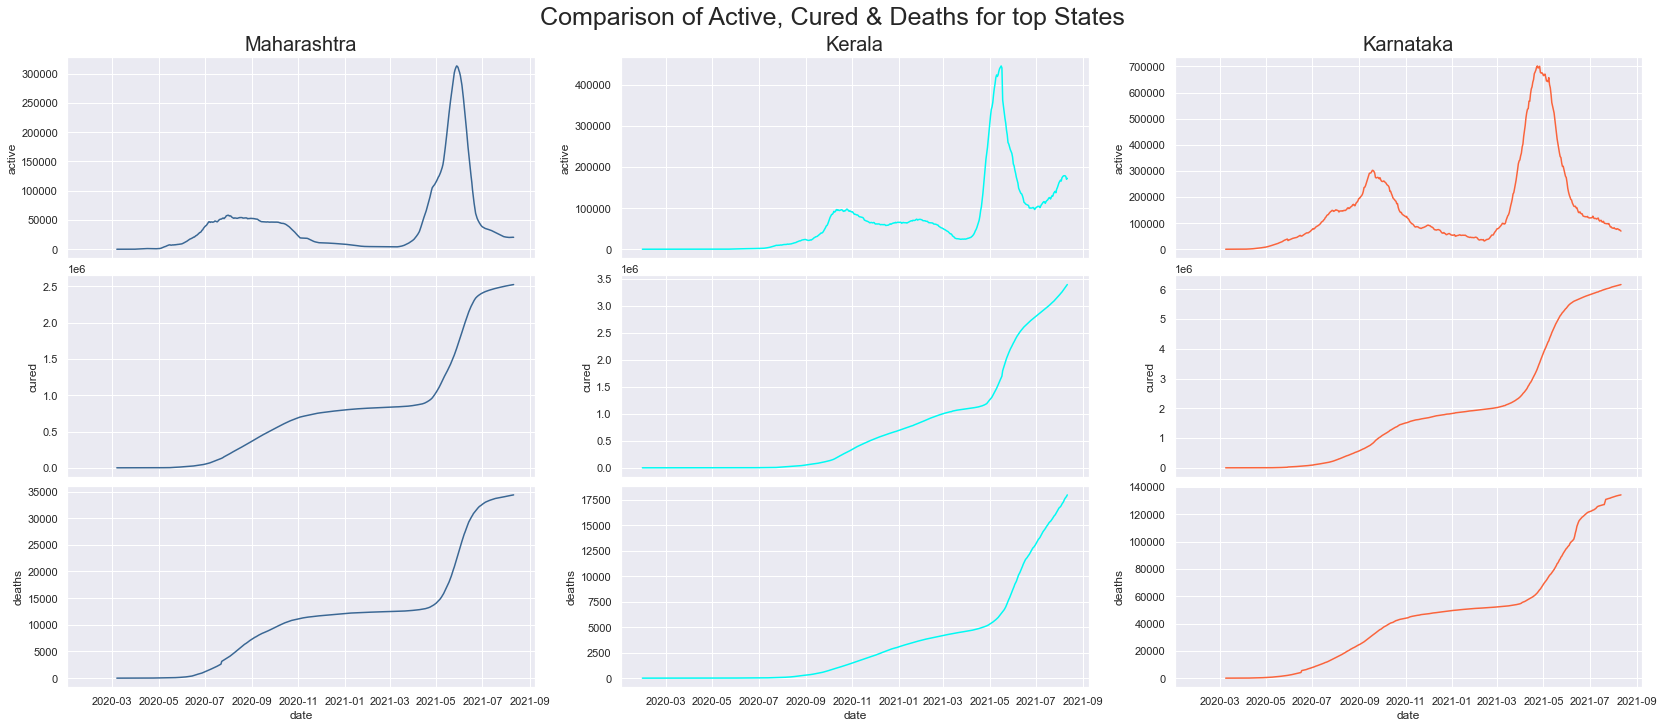

In [24]:
# Compare First 3 States w.r.t Ative, Cured, Deaths
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)
sns.lineplot(data=tn, x='date',y='active', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Maharashtra", size=20)
sns.lineplot(data=tn, x='date',y='cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='date',y='deaths', ax=ax[2,0], color=colors[1])

sns.lineplot(data=kl, x='date',y='active', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Kerala", size=20)
sns.lineplot(data=kl, x='date',y='cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='date',y='deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='date',y='active', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Karnataka", size=20)
sns.lineplot(data=mh, x='date',y='cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='date',y='deaths', ax=ax[2,2], color=colors[3])
plt.show()

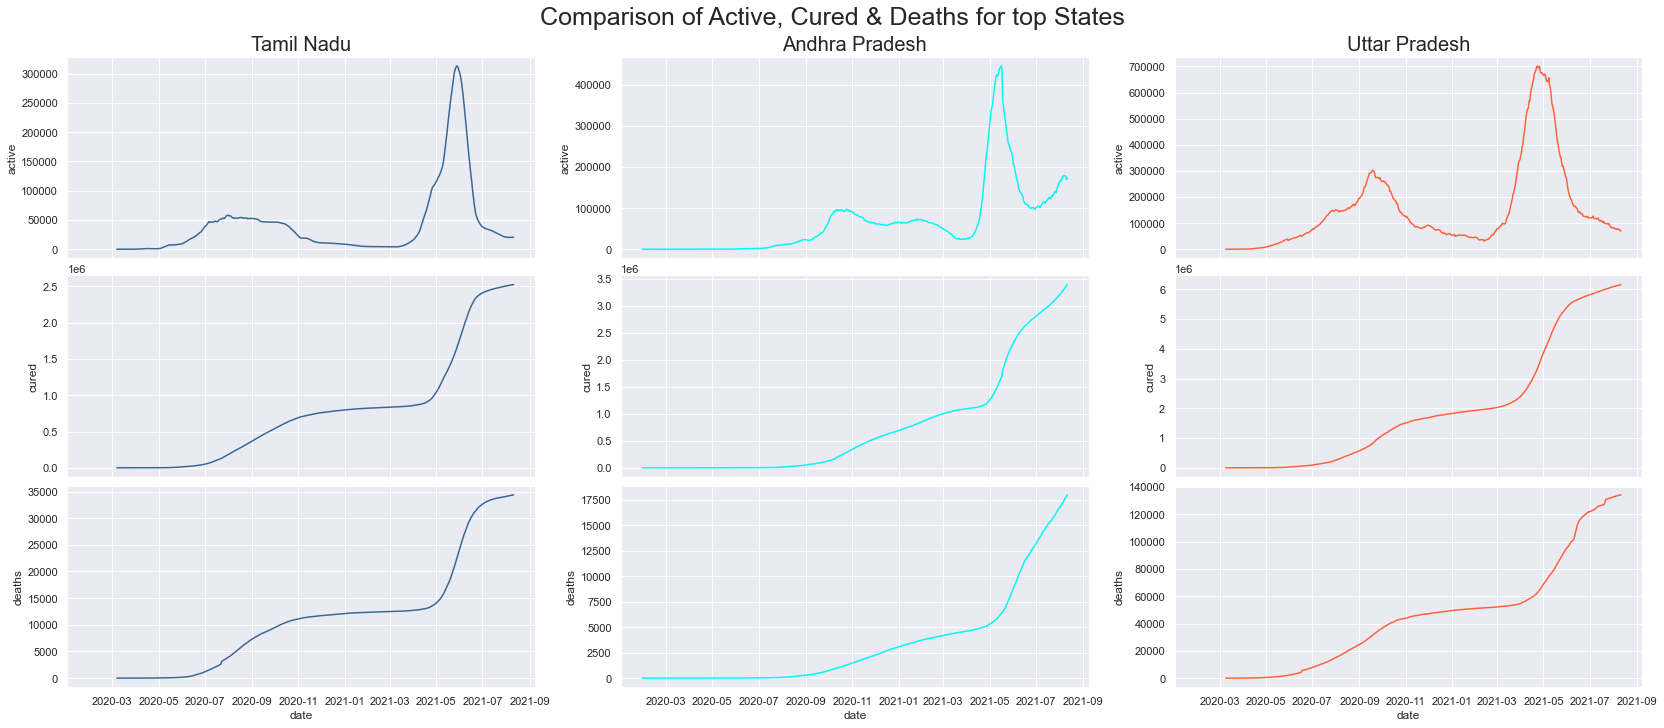

In [25]:
# Compare Last 3 States w.r.t Ative, Cured, Deaths
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)
sns.lineplot(data=tn, x='date',y='active', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Tamil Nadu", size=20)
sns.lineplot(data=tn, x='date',y='cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='date',y='deaths', ax=ax[2,0], color=colors[1])

sns.lineplot(data=kl, x='date',y='active', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Andhra Pradesh", size=20)
sns.lineplot(data=kl, x='date',y='cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='date',y='deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='date',y='active', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Uttar Pradesh", size=20)
sns.lineplot(data=mh, x='date',y='cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='date',y='deaths', ax=ax[2,2], color=colors[3])
plt.show()

Total number of Active Covid-19 cases across India

In [26]:
print('Total number of Active Covid-19 cases across India : {}'.format(max_confirmed_cases['active'].sum()))
top_cases = max_confirmed_cases.groupby('state')['active'].max().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='flare')

Total number of Active Covid-19 cases across India : 386351


,active
state,
Kerala,172505
Maharashtra,69565
Karnataka,22702
Tamil Nadu,20363
Andhra Pradesh,18882
Mizoram,12427
Assam,11045
West Bengal,10215
Odisha,9722


In [27]:
# Renaming the columns name
covid_df.columns=['Date', 'State', 'Cured', 'Deaths', 'Confirmed', 'Active']

#Copying the contry_df data to df for easy reference
df=covid_df.copy()


df['Date']= pd.to_datetime(df['Date'])          # Date is converted to DateTime format.
data_20 = df[df['Date'].dt.year==2020]          # Considering data of only the year 2020.   
data_21 = df[df['Date'].dt.year==2021]          # Considering data of only the year 2021.  

# Month is accessed from the DateTime object.
data_20['Month']=data_20['Date'].dt.month                    
data_21['Month']=data_21['Date'].dt.month    

#Year 2020
# creating instances for 'confirmed','deaths','discharged' by month column
data_confirm_20= data_20['Confirmed'].groupby(data_20['Month']).sum()
data_dis_20= data_20['Cured'].groupby(data_20['Month']).sum()      
data_death_20= data_20['Deaths'].groupby(data_20['Month']).sum()

#Year 2021
# creating instances for 'confirmed','deaths','discharged' by month column
data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()
data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum()
data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()

cols_20=[data_confirm_20,data_dis_20,data_death_20]
data_20=pd.concat(cols_20,axis=1)  

cols_21=[data_confirm_21,data_dis_21,data_death_21]
data_21=pd.concat(cols_21,axis=1) 

#Year 2020
# create instances for 'death_rate and discharge_rate'
data_20['discharge_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4)
data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)

#Year 2020
# create instances for 'death_rate and discharge_rate'
data_21['discharge_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4)      
data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)

In [28]:
#Year 2020
data_20.reset_index(inplace=True)
data_20.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_20,death_rate_20
0,1,2,0,0,0.0000,0.0000
1,2,86,0,0,0.0000,0.0000
2,3,9687,808,202,8.3411,2.0853
3,4,422442,75443,13270,17.8588,3.1413
4,5,2938234,1133341,89834,38.5722,3.0574


In [29]:
#Year 2021
data_21.reset_index(inplace=True)
data_21.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_21,death_rate_21
0,1,326469747,315332019,4709167,96.5884,1.4425
1,2,305631803,297133802,4359434,97.2195,1.4264
2,3,356305616,342610397,4935253,96.1563,1.3851
3,4,440660671,384990190,5340298,87.3666,1.2119
4,5,751927486,645106765,8390917,85.7937,1.1159


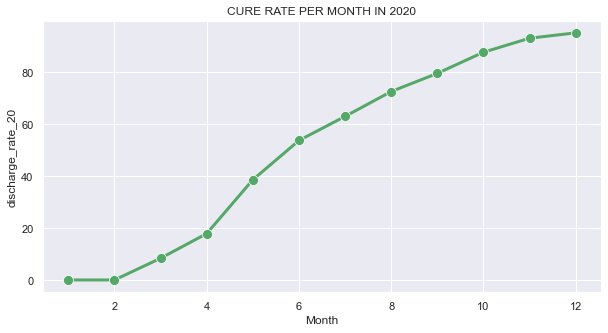

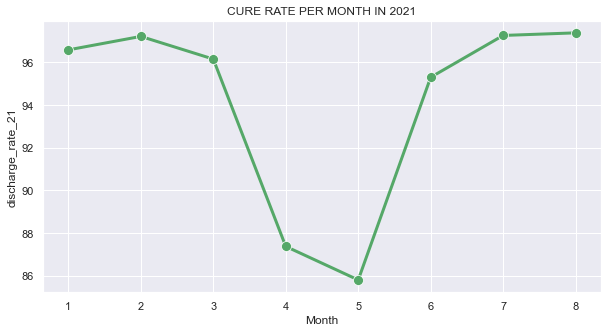

In [30]:
# CURE RATE PER MONTH IN 2020 vs 2021
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_20",data=data_20,color="g",lw=3,marker='o',markersize=10)
plt.title('CURE RATE PER MONTH IN 2020')
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_21",data=data_21,color="g",lw=3,marker='o',markersize=10)
plt.title('CURE RATE PER MONTH IN 2021')
plt.show()

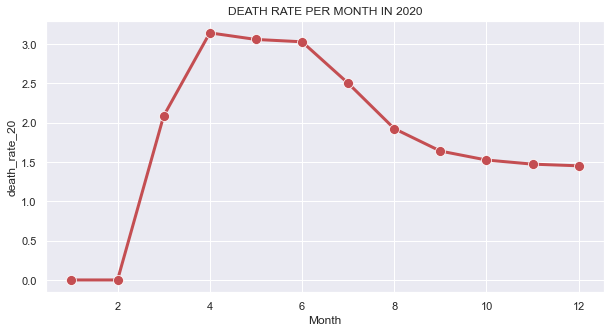

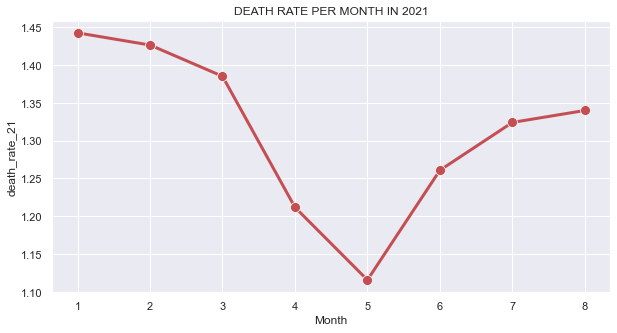

In [31]:
# DEATH RATE PER MONTH IN 2020 vs 2021

plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_20",data=data_20,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2020')
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_21",data=data_21,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2021')
plt.show()

## Conclusion
* On 11th August, 2021, total number of confirmed cases in India had reached 3.2 crores, out of which 3.1 crore poeple had been cured and the number of reported deaths was around 4.29 lakhs.
* Maharashtra, Kerala and Karnataka were the top three states with the most confirmed cases.
* Maharashtra, Kerala and Karnataka are having the most confirmed cases but as well as recovery rate is also very good in these states.
* In the cases by month graph, we see that the number of cases are less in winter months compared to summer months, which might suggest that coronavirus becomes more active in summer. However, I need more data to support this hypothesis.

## FORECASTING AND PREDICTION MODEL

Prophet :- a procedure for time series data based on as additive model where non-linear trends are fit with yearly, weekly, and daily seasonality. Works best with time series.

In [32]:
from prophet import Prophet

In [33]:
#splitting the data frames into three categories
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
recovered = df.groupby('Date').sum()['Cured'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


##### Forecasting Confirmed Cases using Forecasting

In [34]:
# The input of prophet is always a dataframe with 2 columns: 'ds' and 'y'. The ds(datestamp) should be in format 
# 'y' column must be numeric, and represent the measurement we wish to forecast
confirmed.columns = ['ds', 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

confirmed.tail()

,ds,y
555,2021-08-07,31895385
556,2021-08-08,31934455
557,2021-08-09,31969954
558,2021-08-10,31998158
559,2021-08-11,32036511


Generating a week ahead forecast of confirm cases with 95% prediction interval by creating a base model

In [35]:
# Note: Since we are using monthly data, we'll see a message from Prophet saying Disabling weekly seasonality.
# Run prophet with yearly_seasonality=True and daily_seasonality=True to override this.
# This is OK since we are working with monthly data.
m = Prophet(interval_width=0.95,yearly_seasonality=True, daily_seasonality=True)
m.fit(confirmed)

#Making future prediction for next 7 days
future = m.make_future_dataframe(periods=7)
future.tail(10)

,ds
557,2021-08-09
558,2021-08-10
559,2021-08-11
560,2021-08-12
561,2021-08-13
562,2021-08-14
563,2021-08-15
564,2021-08-16
565,2021-08-17
566,2021-08-18


The Predict method will assign each row in future a predicted value which it names yhat. 

In [36]:
# Predicting the future with date, upper and lower limit of y value
forecast = m.predict(future)
# yhat is predicted values and yhat_lower and y_hat upper is the tolerance of y_hat.
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
562,2021-08-14,3.253510e+07,3.199502e+07,3.308177e+07
563,2021-08-15,3.261081e+07,3.215137e+07,3.311151e+07
564,2021-08-16,3.268266e+07,3.214746e+07,3.320657e+07
565,2021-08-17,3.273795e+07,3.219017e+07,3.327464e+07
566,2021-08-18,3.274229e+07,3.218241e+07,3.329966e+07


Plot the forecast by calling the Prophet.plot method and passing forecast dataframe.

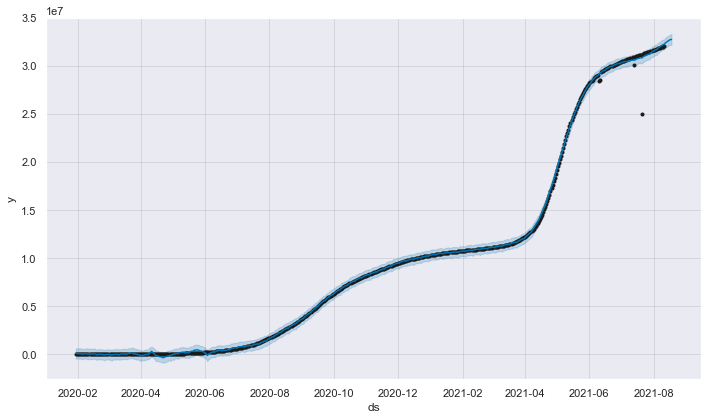

In [37]:
confirmed_forecast_plot = m.plot(forecast)
# black dots are original values and blue line is forecast values with lower and upper limit.

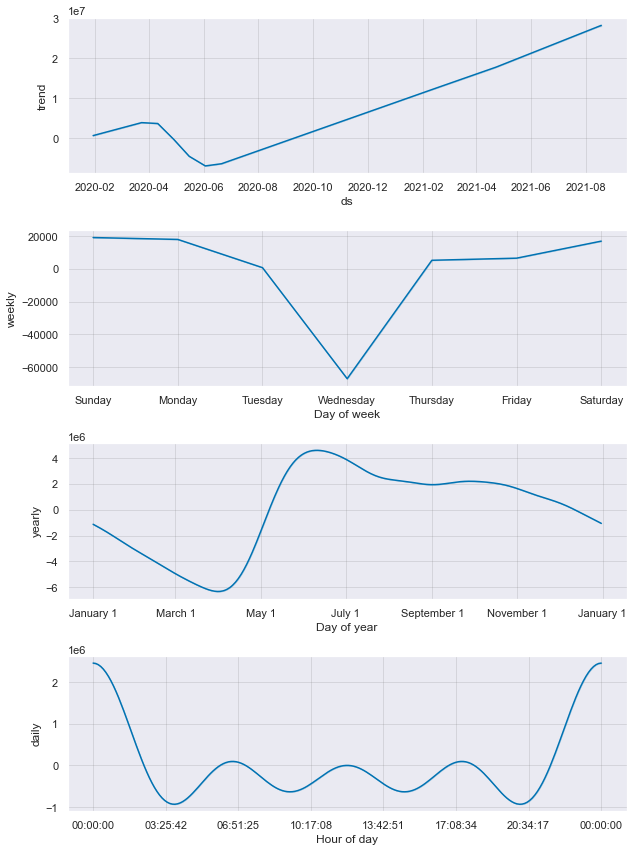

In [38]:
confirmed_forecast_plot = m.plot_components(forecast)

##### Forecasting Death Cases using Forecasting

In [39]:
deaths.columns = ['ds', 'y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

deaths.tail()

,ds,y
555,2021-08-07,427371
556,2021-08-08,427862
557,2021-08-09,428309
558,2021-08-10,428682
559,2021-08-11,429179


In [40]:
m = Prophet(interval_width=0.95,yearly_seasonality=True, daily_seasonality=True) 
m.fit(deaths)

#Making future prediction for next 7 days
future = m.make_future_dataframe(periods=7)
future.tail(10)

,ds
557,2021-08-09
558,2021-08-10
559,2021-08-11
560,2021-08-12
561,2021-08-13
562,2021-08-14
563,2021-08-15
564,2021-08-16
565,2021-08-17
566,2021-08-18


In [41]:
# Predicting the future with date, upper and lower limit of y value
forecast = m.predict(future)
# yhat is predicted values and yhat_lower and y_hat upper is the tolerance of y_hat.
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
562,2021-08-14,438792.697301,428224.246007,449547.159370
563,2021-08-15,439958.661124,428983.309877,450412.529485
564,2021-08-16,441069.135334,430639.772710,452910.157902
565,2021-08-17,442013.355890,431480.877222,452834.015170
566,2021-08-18,441737.587360,431047.576645,451782.872365


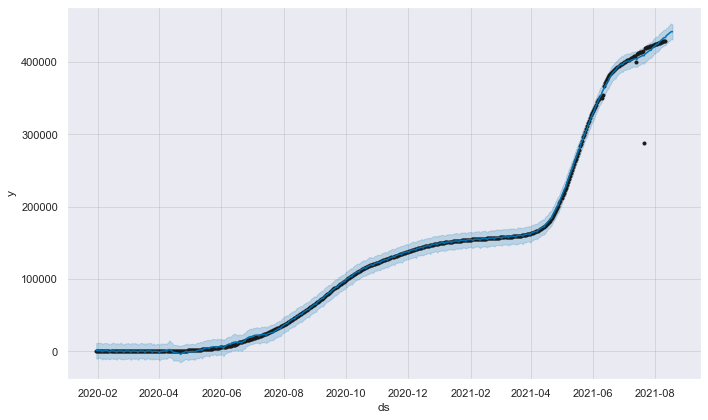

In [42]:
deaths_forecast_plot = m.plot(forecast)
# black dots are original values and blue line is forecast values with lower and upper limit.

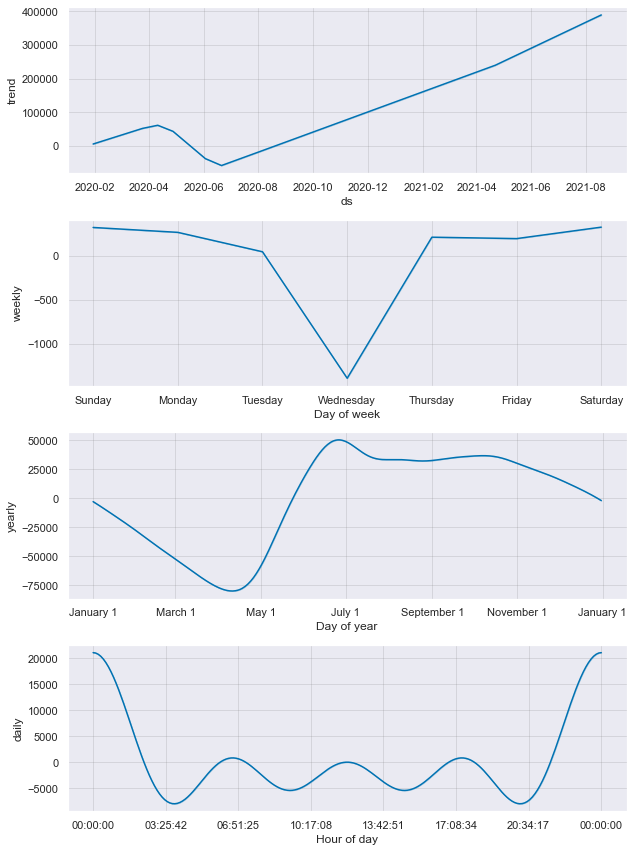

In [43]:
deaths_forecast_plot = m.plot_components(forecast)

##### Forecasting Recovered Cases using Forecasting

In [44]:
recovered.columns = ['ds', 'y']
recovered['ds'] = pd.to_datetime(deaths['ds'])

recovered.tail()

,ds,y
555,2021-08-07,31055861
556,2021-08-08,31099771
557,2021-08-09,31139457
558,2021-08-10,31180968
559,2021-08-11,31220981


In [45]:
m = Prophet(interval_width=0.95,yearly_seasonality=True, daily_seasonality=True)
m.fit(recovered)

#Making future prediction for next 7 days
future = m.make_future_dataframe(periods=7)
future.tail(10)

,ds
557,2021-08-09
558,2021-08-10
559,2021-08-11
560,2021-08-12
561,2021-08-13
562,2021-08-14
563,2021-08-15
564,2021-08-16
565,2021-08-17
566,2021-08-18


In [46]:
# Predicting the future with date, upper and lower limit of y value
forecast = m.predict(future)
# yhat is predicted values and yhat_lower and y_hat upper is the tolerance of y_hat.
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
562,2021-08-14,3.173173e+07,3.123860e+07,3.223164e+07
563,2021-08-15,3.181261e+07,3.130489e+07,3.231678e+07
564,2021-08-16,3.188791e+07,3.136148e+07,3.244757e+07
565,2021-08-17,3.195700e+07,3.141843e+07,3.247341e+07
566,2021-08-18,3.197031e+07,3.147218e+07,3.247241e+07


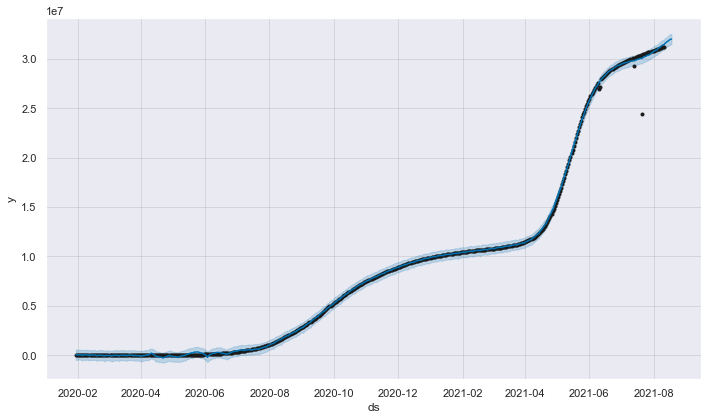

In [47]:
recovered_forecast_plot = m.plot(forecast)
# black dots are original values and blue line is forecast values with lower and upper limit.

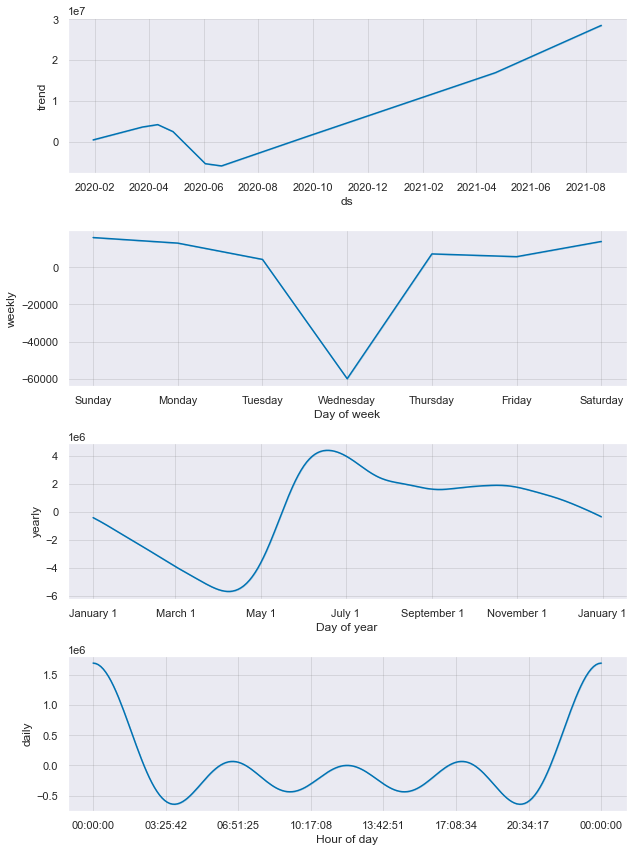

In [48]:
recovered_forecast_plot = m.plot_components(forecast)